<a href="https://colab.research.google.com/github/Eduardo7660/Eduardo7660/blob/main/C%C3%B3pia_de_trab_proc_IMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import padrão


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

pega a imagem

In [ ]:
base_img = cv2.imread("/content/drive/MyDrive/PIMAGENS/arara2.png", 1)

exibe a imagem

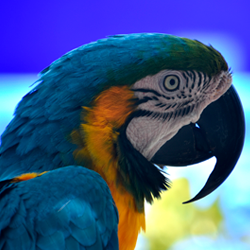

In [ ]:
cv2_imshow(base_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

código para mostrar as dimensões da imagemb

In [ ]:
base_img.shape

(220, 220, 3)

convertendo as 3 dimenções da imagem para escala cinza (greys_cale)

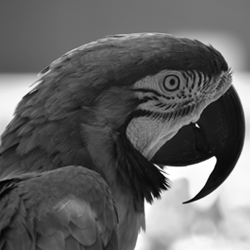

In [ ]:
img_grayscale_basic = (base_img[:, :, 0]*0.30) + (base_img[:, :, 1]*0.59) + (base_img[:, :, 2]*0.11)
img_grayscale_basic = np.array(img_grayscale_basic, dtype=np.uint8)
cv2_imshow(img_grayscale_basic)


histograma

In [ ]:
histogram = np.zeros(256)
for i in range (img_grayscale_basic.shape[0]):
  for j in range (img_grayscale_basic.shape[1]):
    histogram[img_grayscale_basic[i,j]] +=1


tabela do histograma

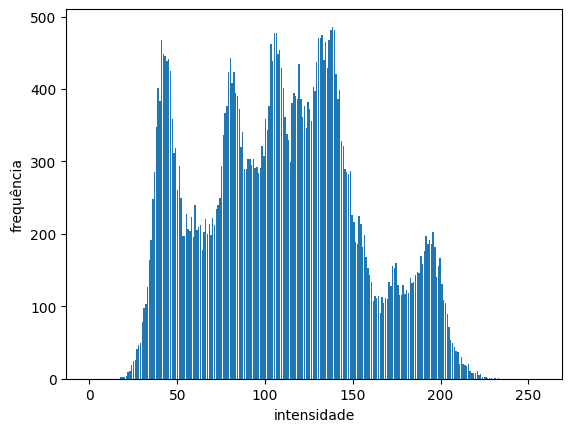

In [ ]:
x = np.linspace(0,256,256)
plt.bar(x, histogram)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

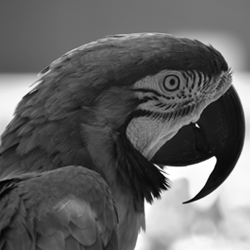

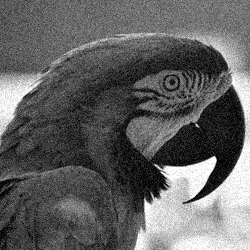

In [ ]:
ruido = np.random.randn(img_grayscale_basic.shape[0], img_grayscale_basic.shape[1]) * 15
imagem_com_ruido = img_grayscale_basic + ruido.astype(dtype = np.float32)

cv2_imshow(img_grayscale_basic)
cv2.waitKey(0)
cv2_imshow(imagem_com_ruido)
cv2.waitKey(0)
cv2.destroyAllWindows()

transformação negativa

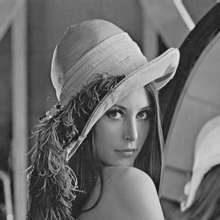

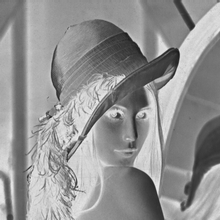

In [ ]:
img_negative_np = 255 - img_grayscale_basic

cv2_imshow(img_grayscale_basic)
cv2.waitKey(0)
cv2_imshow(img_negative_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

contraste e brilho

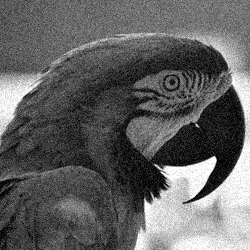

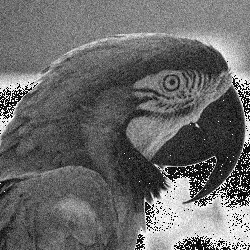

In [ ]:
x= 1
y= 20
img_contraste_brilho = x*imagem_com_ruido+y
img_contraste_brilho = np.array(img_contraste_brilho, dtype = np.uint8)

cv2_imshow(imagem_com_ruido)
cv2.waitKey(0)
cv2_imshow(img_contraste_brilho)
cv2.waitKey(0)
cv2.destroyAllWindows()


gamma


<ipython-input-156-88c1913251a9>:8: RuntimeWarning: invalid value encountered in power
  img_gamma[i,j] = c * np.power(imagem_com_ruido[i,j], gamma)
<ipython-input-156-88c1913251a9>:8: RuntimeWarning: invalid value encountered in cast
  img_gamma[i,j] = c * np.power(imagem_com_ruido[i,j], gamma)


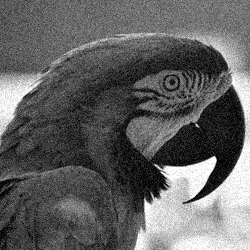

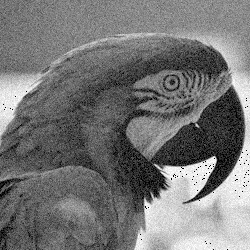

In [ ]:
c = 5
gamma = 0.7

img_gamma = np.array(imagem_com_ruido, dtype = 'uint8')

for i in range(imagem_com_ruido.shape[0]):
  for j in range(imagem_com_ruido.shape[1]):
    img_gamma[i,j] = c * np.power(imagem_com_ruido[i,j], gamma)
    if img_gamma[i,j] >255:
      img_gamma[i,j] = 255
    elif img_gamma[i,j] < 0:
      img_gamma[i,j] = 0
img_gamma = np.array(img_gamma, dtype = 'uint8')
cv2_imshow(imagem_com_ruido)
cv2_imshow(img_gamma)

In [ ]:
def blur_media(imagem):
  """
  Função que simula a filtragem por média do OpenCV com kernel 3x3.

  Argumentos:
    imagem: Matriz NumPy que representa a imagem a ser filtrada.
    kernel_size: Tamanho do kernel (padrão: 3).

  Retorna:
    Matriz NumPy que representa a imagem filtrada.
  """
  # Kernel 3x3
  kernel = 3

  # Calculando o padding do kernel
  pad = kernel // 2

  # Fazendo o padding na imagem
  imagem_padded = np.pad(imagem, ((pad, pad), (pad, pad)), mode='constant')

  # Inicializando a imagem filtrada (apenas um canal)
  imagem_filtrada = np.zeros_like(imagem)

  # Percorrendo os pixels da imagem original
  for i in range(imagem.shape[0]):
    for j in range(imagem.shape[1]):
      # Calculando a soma dos valores na vizinhança do kernel
      soma = 0
      for k in range(-pad, pad + 1):
        for l in range(-pad, pad + 1):
          soma += imagem_padded[i + k, j + l]

      # Calculando a média e atribuindo à imagem filtrada
      imagem_filtrada[i, j] = soma / (kernel ** 2)

  return imagem_filtrada


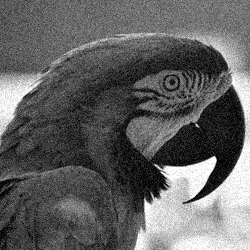

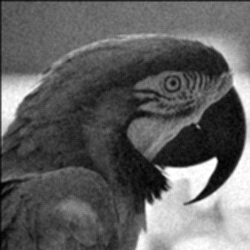

In [ ]:
imagem_filtrada_media = blur_media(imagem_com_ruido)

# Exibindo as imagens (original e com filtro)
cv2_imshow(imagem_com_ruido)
cv2.waitKey(0)
cv2_imshow(imagem_filtrada_media)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
def gaussian_blur(imagem, sigma=1.0):
  """
  Função que simula a filtragem gaussiana do OpenCV com kernel 3x3 e sigma padrão 1.0.

  Argumentos:
    imagem: Matriz NumPy que representa a imagem a ser filtrada.
    sigma: Desvio padrão da distribuição gaussiana (padrão: 1.0).

  Retorna:
    Matriz NumPy que representa a imagem filtrada.
  """

  kernel = 3

  # Calculando o raio do kernel
  radius = (kernel - 1) // 2

 # Criando o kernel gaussiano
  kernel = np.zeros((kernel, kernel))
  for i in range(-radius, radius + 1):
    for j in range(-radius, radius + 1):
      x2 = i ** 2
      y2 = j ** 2
      sigma2 = 2 * sigma ** 2
      kernel[i + radius, j + radius] = np.exp(-(x2 + y2) / sigma2) / (2 * np.pi * sigma2)

  # Normalizando o kernel
  kernel /= np.sum(kernel)

  # Fazendo o padding na imagem
  imagem_padded = np.pad(imagem, ((radius, radius), (radius, radius)), mode='constant')

  # Inicializando a imagem filtrada (apenas um canal)
  imagem_filtrada = np.zeros_like(imagem)

  # Percorrendo os pixels da imagem original
  for i in range(imagem.shape[0]):
    for j in range(imagem.shape[1]):
      # Calculando a convolução com o kernel
      soma = 0
      for k in range(-radius, radius + 1):
        for l in range(-radius, radius + 1):
          soma += imagem_padded[i + k, j + l] * kernel[k + radius, l + radius]

      # Atribuindo o valor filtrado à imagem filtrada
      imagem_filtrada[i, j] = soma

  return imagem_filtrada


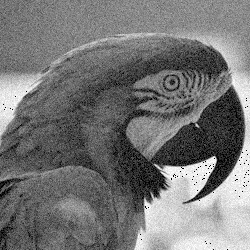

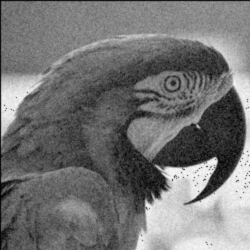

In [ ]:
imagem_filtrada_gausiana = gaussian_blur(img_gamma, 0.6)

# Exibindo as imagens (original e com filtro)
cv2_imshow(img_gamma)
cv2.waitKey(0)
cv2_imshow(imagem_filtrada_gausiana)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def median_blur(imagem):
  """
  Função que simula a filtragem por mediana do OpenCV (grayscale) com kernel 3x3.

  Argumentos:
    imagem: Matriz NumPy que representa a imagem em tons de cinza a ser filtrada.

  Retorna:
    Matriz NumPy que representa a imagem filtrada em tons de cinza.
  """

  kernel = 3

  # Calculando o raio do kernel
  radius = (kernel - 1) // 2

  # Fazendo o padding na imagem
  imagem_padded = np.pad(imagem, ((radius, radius), (radius, radius)), mode='constant')

  # Inicializando a imagem filtrada (apenas um canal)
  imagem_filtrada = np.zeros_like(imagem)

  # Percorrendo os pixels da imagem original
  for i in range(imagem.shape[0]):
    for j in range(imagem.shape[1]):
      # Extraindo os valores na vizinhança do kernel
      vizinhanca = imagem_padded[i-radius:i+radius+1, j-radius:j+radius+1]

      # Flattenizando a vizinhança para ordenação
      vizinhanca_flatten = vizinhanca.flatten()

      # Ordenando os valores da vizinhança
      np.sort(vizinhanca_flatten)

      # Verificando se o array não está vazio
      if len(vizinhanca_flatten) > 0:
        # Encontrando o valor mediano
        mediana = vizinhanca_flatten[kernel ** 2 // 2]
      else:
        # Definindo um valor padrão para mediana em caso de array vazio
        mediana = 0

      # Atribuindo o valor mediano (ou padrão) à imagem filtrada
      imagem_filtrada[i, j] = mediana

  return imagem_filtrada


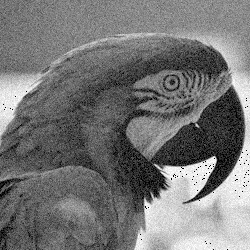

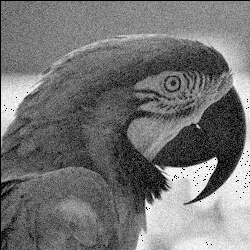

In [ ]:
imagem_filtrada_mediana = median_blur(img_gamma)

cv2_imshow(img_gamma)
cv2.waitKey(0)
cv2_imshow(imagem_filtrada_mediana)
cv2.waitKey(0)
cv2.destroyAllWindows()